In [4]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
import figurefirst

#misc
import time
np.set_printoptions(suppress=True)

## Visualization

### Heatmap Calculation

In [2]:
df1 = pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/Run01Run02Run03_Expected.h5')
df2 = pd.read_hdf('~/Documents/Myfiles/DataAnalysis/data/Sprints/LowRes/NotWindy_Expected.h5')

In [4]:
query_1 = 'odor>=2'
query_2 = 'odor<2'
df_occurence = df.query(query_1)
df2_occurence = df.query(query_2)

In [50]:
dt=df2.master_time[1]-df2.master_time[0]
cutoff_freq = (1/dt)*3
sos = signal.butter(1, cutoff_freq, 'low', fs=1000, output='sos')
filtered = signal.sosfilt(sos, df1.odor)

# fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(20,4))
# ax1.plot(df1.sync_time, df1.odor, label='original', alpha = 0.8)
# ax1.plot(df1.sync_time, filtered, label='filtered')

# ax1.legend()

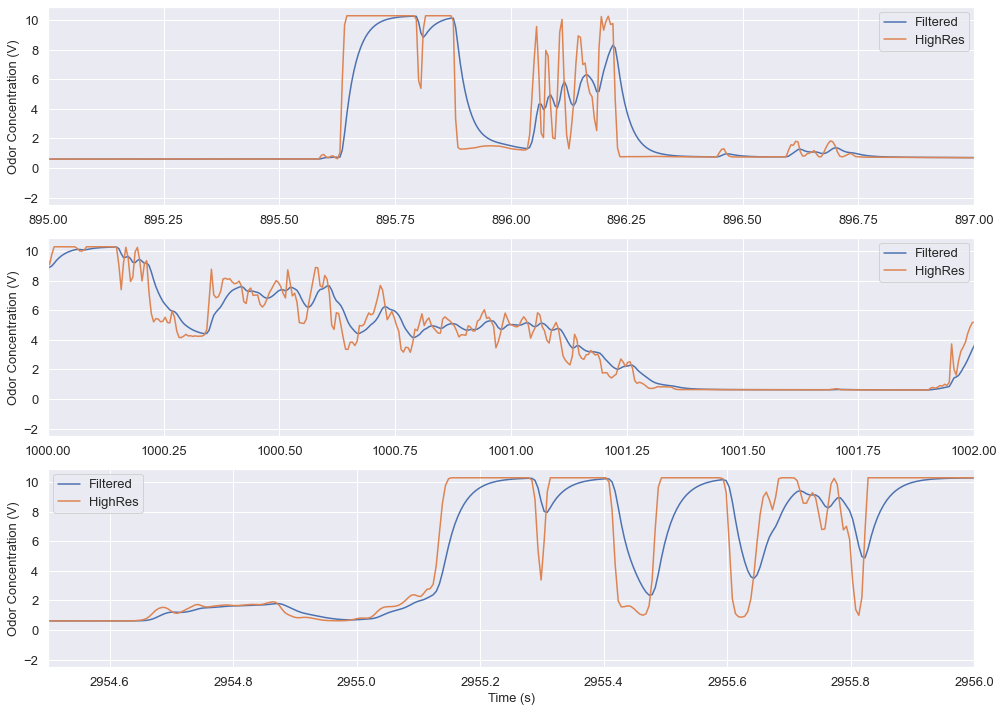

In [51]:
f, (ax1,ax2,ax3)= plt.subplots(3,1, figsize =(14,10), gridspec_kw={'height_ratios': [4,4,4]})
# f.suptitle('Influence of sensor motion on odor encounters')
ax1.plot(df1.sync_time, filtered, label='Filtered')
ax1.plot(df1.sync_time, df1.odor, label='HighRes')
# ax1.plot(df2.sync_time, df2.odor, label='LowRes')
# ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Odor Concentration (V)')
ax1.set_xlim(895,897)
ax1.legend()

ax2.plot(df1.sync_time, filtered, label='Filtered')
ax2.plot(df1.sync_time, df1.odor, label='HighRes')
# ax2.plot(df2.sync_time, df2.odor, label='LowRes')
# ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Odor Concentration (V)')
ax2.set_xlim(1000,1002)
ax2.legend()

ax3.plot(df1.sync_time, filtered, label='Filtered')
ax3.plot(df1.sync_time, df1.odor, label='HighRes')
# ax3.plot(df2.sync_time, df2.odor, label='LowRes')
ax3.set_xlim(2954.50,2956)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Odor Concentration (V)')
ax3.legend()

f.tight_layout()
figurefirst.mpl_functions.set_fontsize(f, 13)
# f.savefig('../../Figure/zoomed_odor.jpeg')

#### Underlay Distance Plot with Encounter Plot

In [5]:
x = np.linspace(0,45,25)
y = np.linspace(0,35,10)
H1, x, y = np.histogram2d(df_occurence.distance_from_source, df_occurence.nearest_from_streakline, bins=(x, y), 
                          weights = df_occurence.odor)
N_Encounter = H1.T 
H2, x, y = np.histogram2d(df.distance_from_source, df.nearest_from_streakline, bins=(x, y), 
                          weights = df.odor)
Total = H2.T 

## removing areas less than 4000 deno

for i in range (len(Total)):
    for j in range(len(Total[i])):
        if Total[i][j]<200:
            Total[i][j] =0
            N_Encounter[i][j]=0

Encounters = np.array(N_Encounter)/np.array(Total)
Encounters[Encounters == np.inf] = 0

<ipython-input-5-fe6a1c41a1d7>:18: RuntimeWarning: invalid value encountered in true_divide
  Encounters = np.array(N_Encounter)/np.array(Total)


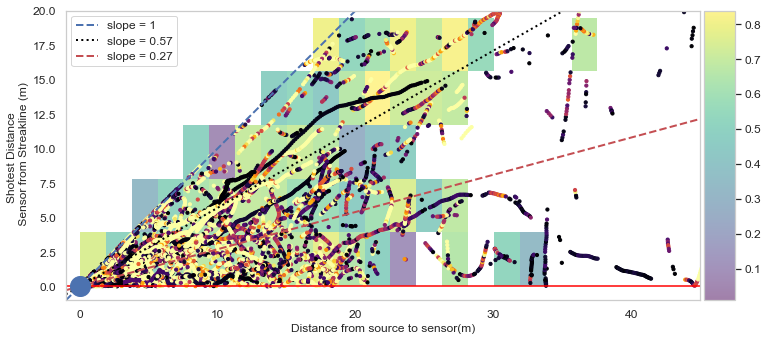

In [88]:
f, (ax1) = plt.subplots(1,1, figsize =(12,7)) # , gridspec_kw={'height_ratios': [4,4]})


#plot wind vs odor from source and each other
# f.suptitle('Odor Positions from Wind Particle \n Wind Speed > 3m/s', fontsize = 16)
ax1.axline((0, 0), slope=1.0, linestyle='dashed', linewidth=2, color='b', label='slope = 1')
ax1.axline((0, 0), slope=0.57, linestyle=':', linewidth=2, color='black', label='slope = 0.57')
ax1.axline((0, 0), slope=0.27, linestyle='--', linewidth=2, color='r', label='slope = 0.27')
ax1.axhline(0, color = 'red')
ax1.plot(0,0,'o', markersize = 20)
ax1.scatter(df_occurence.distance_from_source, df_occurence.nearest_from_streakline, cmap = 'inferno', 
                  c = df_occurence.odor,  s = 10)
var = ax1.imshow(Encounters, interpolation='nearest', origin='lower',cmap = 'viridis', alpha= 0.5, 
           extent=[x[0], x[-1], y[0], y[-1]])

ax1.legend()
ax1.set_xlim ([-1,45])
ax1.set_ylim([-1,20])
ax1.set_xlabel('Distance from source to sensor(m)' , fontsize = 13)
ax1.set_ylabel('Shotest Distance \n Sensor from Streakline (m)' , fontsize = 13)
ax1.grid(False)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(var, cax=cax, orientation = 'vertical')

figurefirst.mpl_functions.set_fontsize(f, 12)
f.savefig('../../Figure/LocationalOdorRep.jpeg')

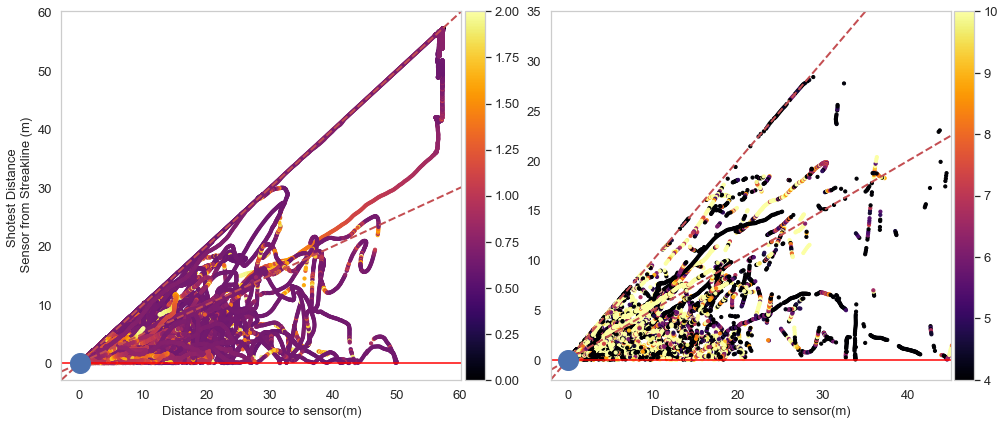

In [65]:
f, (ax1,ax2) = plt.subplots(1,2, figsize =(14,6))
ax1.axline((0, 0), slope=1.0, linestyle='dashed', linewidth=2, color='r')
ax1.axline((0, 0), slope=0.5, linestyle='dashed', linewidth=2, color='r')
ax1.axhline(0, color = 'red')
ax1.grid(False)
ax1.plot(0,0,'o', markersize = 20)
var = ax1.scatter(df2_occurence.distance_from_source, df2_occurence.nearest_from_streakline, cmap = 'inferno', 
                  c = df2_occurence.odor, label ='Odor_Not_Detected', vmin=0, vmax=2, s = 10)
# ax1.imshow(Encounters, interpolation='nearest', origin='lower',cmap = 'viridis', alpha= 0.5, 
#            extent=[x[0], x[-1], y[0], y[-1]])

ax1.set_xlabel('Distance from source to sensor(m)')
ax1.set_ylabel('Shotest Distance \n Sensor from Streakline (m)')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(var, cax=cax, orientation = 'vertical')


ax2.axline((0, 0), slope=1.0, linestyle='dashed', linewidth=2, color='r')
ax2.axline((0, 0), slope=0.5, linestyle='dashed', linewidth=2, color='r')
ax2.axhline(0, color = 'red')
ax2.grid(False)
ax2.plot(0,0,'o', markersize = 20)

var2 = ax2.scatter(df_occurence.distance_from_source, df_occurence.nearest_from_streakline, cmap = 'inferno', 
                  c = df_occurence.odor, vmin=4, vmax=10, s = 10)

ax2.set_xlabel('Distance from source to sensor(m)')
# ax2.set_ylabel('Shotest Distance \n Sensor from Streakline (m)')
ax2.set_xlim ([-2,45])
ax2.set_ylim([-2,35])
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
f.colorbar(var2, cax=cax, orientation = 'vertical')

f.tight_layout()
figurefirst.mpl_functions.set_fontsize(f, 13)
f.savefig('../../Figure/locationalrepOdor.jpeg')

## Find if there was direction change back in time for the above extracted points

In [5]:
df_occurence.insert(26,"slope",(df_occurence.nearest_from_streakline/df_occurence.distance_from_source))

In [10]:
q1 = 'slope>=0 & slope<0.08'
q2 = 'slope>=0.08 & slope<0.17'
q3 = 'slope>=0.17 & slope<0.27'
q4 = 'slope>=0.27 & slope<0.36'
q5 = 'slope>=0.36 & slope<0.46'
q6 = 'slope>=0.46 & slope<0.58'
q7 = 'slope>=0.58 & slope<0.7'
q8 = 'slope>=0.70 & slope<0.84'
q9 = 'slope>=0.84'

time_since_last_change_5 = []
time_since_last_change_10 = []
time_since_last_change_15 = []
time_since_last_change_20 = []
time_since_last_change_25 = []
time_since_last_change_30 = []
time_since_last_change_35 = []
time_since_last_change_40 = []
time_since_last_change_45 = []

In [27]:
df1=pd.DataFrame()
df1=df_occurence.query(q9)

In [28]:
# 100 rows approx 10 seconds for low res
# 2002 rows approx 10 seconds for hi res
lookback_time = 2002 * 5
check_angle = 90
for i in range(0,len(df1.index)): 
    angle = np.abs(df.D[(df1.index[i]-lookback_time):df1.index[i]] 
                   - df.D[df1.index[i]])
    
    if (angle>check_angle).any() == True: 
        pos = np.where(angle >= check_angle)
        time_since_last_change_45.append((lookback_time-pos[-1][-1])/0.005) ## because each row is 1/10 seconds
        
    else:
        continue

In [29]:
df_time=pd.DataFrame()
df_time_1=pd.DataFrame()
df_time_2=pd.DataFrame()
df_time_3=pd.DataFrame()
df_time_4=pd.DataFrame()
df_time_5=pd.DataFrame()
df_time_6=pd.DataFrame()
df_time_7=pd.DataFrame()
df_time_8=pd.DataFrame()
df_time_9=pd.DataFrame()

df_time_1['duration'] = time_since_last_change_5
df_time_1['angle']=np.repeat('0-0.08°',len(time_since_last_change_5))

df_time_2['duration'] = time_since_last_change_10
df_time_2['angle']=np.repeat('0.08-0.17',len(time_since_last_change_10))

df_time_3['duration'] = time_since_last_change_15
df_time_3['angle']=np.repeat('0.17-0.27',len(time_since_last_change_15))

df_time_4['duration'] = time_since_last_change_20
df_time_4['angle']=np.repeat('0.27-0.36',len(time_since_last_change_20))

df_time_5['duration'] = time_since_last_change_25
df_time_5['angle']=np.repeat('0.36-0.46',len(time_since_last_change_25))

df_time_6['duration'] = time_since_last_change_30
df_time_6['angle']=np.repeat('0.46-0.58',len(time_since_last_change_30))

df_time_7['duration'] = time_since_last_change_35
df_time_7['angle']=np.repeat('0.58-0.7',len(time_since_last_change_35))

df_time_8['duration'] = time_since_last_change_40
df_time_8['angle']=np.repeat('0.70-0.84',len(time_since_last_change_40))

df_time_9['duration'] = time_since_last_change_45
df_time_9['angle']=np.repeat('> 0.84',len(time_since_last_change_45))

df_time=pd.concat([df_time_1,df_time_2, df_time_3, df_time_4, df_time_5, df_time_6, df_time_7, df_time_8, df_time_9],
                  ignore_index=True)

In [211]:
# dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/'
# df_time.to_hdf(dir+'AngleDuration0102.h5', key='df_time', mode='w')

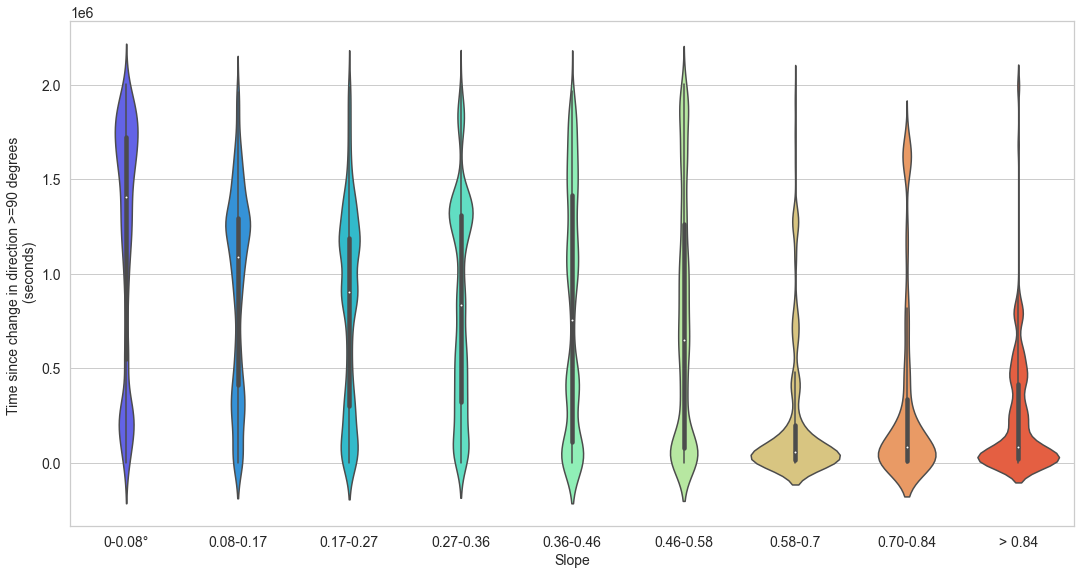

In [47]:
f, ax = plt.subplots(1,1, figsize=(15,8))
sns.violinplot(x='angle',y="duration", data=df_time, dodge='True', palette='rainbow')
# sns.boxplot(x="angle", y="duration", data=df_time,  dodge=True,  palette='viridis' )
# sns.catplot(x="angle", y="duration", data=df_time,  dodge=True,  palette='husl')
# sns.stripplot(x='angle', y='duration', data=df_time, dodge='True')

ax.set_xlabel('Slope')
ax.set_ylabel('Time since change in direction >=90 degrees \n (seconds)')
f.tight_layout()
figurefirst.mpl_functions.set_fontsize(f, 14)
# f.savefig('../../Figure/timesincedirectionchange90HD.jpeg')

#### Find if there was a change in angle - output 0s and 1s

In [109]:
queryx='slope>0.57'
df2=pd.DataFrame()
df2 = df_occurence.query(queryx)

### BootStrap for Probability Significance

In [105]:
df_bootstrap_slopeless = pd.DataFrame()
df_bootstrap_slopemore = pd.DataFrame()
df_bootstrap=pd.DataFrame()

In [106]:
def prob_counter(index):
    for i in range(len(index)):
        if(index[i]<501):
            continue
        else:
            angle = np.abs(df.D[(index[i]-lookback_time):index[i]] - df.D[index[i]])
            if (angle>90).any() == True: 
                angle_changes_1.append(1)

            else: angle_changes_1.append(0)
            
    prob_yes.append(angle_changes_1.count(1)/(angle_changes_1.count(0)+angle_changes_1.count(1)))
    prob_no.append(angle_changes_1.count(0)/(angle_changes_1.count(0)+angle_changes_1.count(1)))
    

In [110]:
prob_yes=[]
prob_no=[]
angle_changes_1 = []
bootstrap_samples = 100
number_of_time = 500
lookback_time = 100*5
for i in range(number_of_time):
    index = np.random.choice(df2.index, size = bootstrap_samples)
    prob_counter(index)

In [48]:
# angle_changes_1 = []
# # 100 rows approx 10 seconds for low res
# # 2002 rows approx 10 seconds for hi res
# lookback_time = 100 * 5
# for i in range(0,len(df2.index)):
#     angle = np.abs(df.D[(df2.index[i]-lookback_time):df2.index[i]] - df.D[df2.index[i]])
#     if (angle>90).any() == True: angle_changes_1.append(1)
#     else: angle_changes_1.append(0)

In [111]:
df_bootstrap_slopemore['prob_of_direction_change'] = prob_yes
df_bootstrap_slopemore['slope']=np.repeat('slope>0.57',len(prob_yes))

In [108]:
df_bootstrap_slopeless['prob_of_direction_change'] = prob_yes
df_bootstrap_slopeless['slope']=np.repeat('slope<0.57',len(prob_yes))

In [112]:
df_bootstrap=pd.concat([df_bootstrap_slopemore,df_bootstrap_slopeless],
                  ignore_index=True)

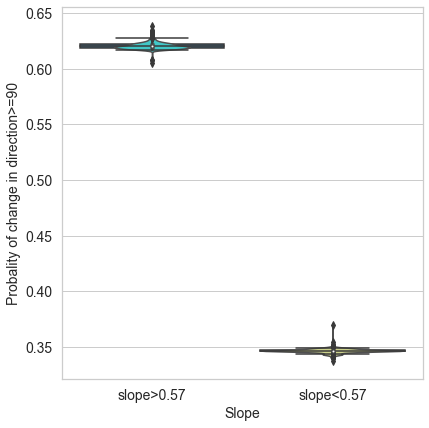

In [118]:
f, ax = plt.subplots(1,1, figsize=(6,6))
sns.violinplot(x="slope", y="prob_of_direction_change", data=df_bootstrap, dodge='True', palette='rainbow')
sns.boxplot(x="slope", y="prob_of_direction_change", data=df_bootstrap,  dodge=True,  palette='viridis' )
# sns.catplot(x="slope", y="prob_of_direction_change", data=df_bootstrap, dodge=True,  palette='husl')
# sns.stripplot(x="slope", y="prob_of_direction_change", data=df_bootstrap, dodge='True')
ax.set_xlabel('Slope')
ax.set_ylabel('Probality of change in direction>=90')
f.tight_layout()

figurefirst.mpl_functions.set_fontsize(f, 14)
f.savefig('../../Figure/probchangedirection.jpeg')

### Summary Plot

In [3]:
# f, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(15,15) , gridspec_kw={'height_ratios': [8,3,3,3]})

# #plot wind vs odor from source and each other
# f.suptitle('Odor Positions from Wind Particle', fontsize = 16)
# # ax1 = plt.axes(xlim =(0,35), ylim=(-5,28))
# ax1.axhline(0, color = 'red')
# ax1.plot(0,0,'o', markersize = 20)
# # area = df.radius**2*0.4*m.pi #area
# # ax1.scatter(area[0:30]**2,df.mock[0:30])
# # ax1.scatter(df.sync_time[::300], df.mock[::300],  facecolors='none', edgecolors='b', s = area[::300])
# var = ax1.scatter(df.distance_along_streakline, df.nearest_particle, cmap = 'BuPu', c = df.odor,  s = 10)
# ax1.set_xlabel('Distance - Sensor to Source (meters)' , fontsize = 15)
# ax1.set_ylabel('Distance - Sensor to Streakline (meter)' , fontsize = 15)
# # ax1.xaxis.set_ticks(np.linspace(0, 30, 31).astype(int))
# # ax1.yaxis.set_ticks(np.linspace(0, 35, 10).astype(int))
# ax1.grid()

# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('top', size='5%', pad=0.05)
# f.colorbar(var, cax=cax, orientation = 'horizontal')

# #plot concentration
# ax2.plot(df.sync_time,df.odor,color='Purple' , label="Encountered Odor")
# ax2.fill_between(df.sync_time, df.odor.min(), 11, where=df.odor_expected>0 ,facecolor='C1', alpha=1, label="Expected Odor")
# # ax2.plot(df.sync_time, df.odor_expected, label="Expected Odor")
# ax2.set_xlabel('Time (seconds)' , fontsize = 15)
# ax2.set_ylabel('Odor \n Comparison' , fontsize = 15)
# # ax2.set_facecolor('black')

# lgd=ax2.legend(loc='upper right',fancybox=True, shadow=True)

# ## plot direction
# ax3.plot(df.sync_time,df.D, color = 'green', label="Wind Direction")
# # ax3.plot(df.sync_time,sensor_direction, color = 'purple', label="Sensor Direction")
# ax3.set_xlabel('Time (seconds)' , fontsize = 15)
# ax3.set_ylabel('Direction (degrees)' , fontsize = 15)
# # ax3.axhline(150, color = 'red')
# lgd=ax3.legend(loc='upper right',fancybox=True, shadow=True)



# ## plot speed
# ax4.plot(df.sync_time,df.S2, color = 'green', label="Wind Speed")
# ax4.set_xlabel('Time (seconds)' , fontsize = 15)
# ax4.set_ylabel('Wind Speed (m/s)' , fontsize = 15)
# lgd=ax4.legend(loc='upper right',fancybox=True, shadow=True)
# # ax4.axhline(1.0, color = 'red')

# f.tight_layout()

# # f.savefig(dir_save+'Run0'+str(run)+'_plot_summary.jpeg')

#### Regression Plots

In [ ]:
# sns.set_style('ticks')
# fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2)
# fig.set_size_inches(20,20)
# sns.regplot(y=fdf.odor, x=fdf.avg_dist_fromsource, color='blue', marker='+', ax=ax1)
# sns.regplot(y=fdf.relative_motion, x=fdf.avg_dist_fromsource, color='magenta', marker='+', ax=ax2)
# sns.regplot(y=fdf.length_of_encounter, x=fdf.avg_dist_fromsource, color='green', marker='+', ax=ax3)
# sns.regplot(y=fdf.odor_intermittency, x=fdf.avg_dist_fromsource, color='orange', marker='+', ax=ax4)
# sns.regplot(y=fdf.tri_pressure, x=fdf.avg_dist_fromsource, color='red', marker='+', ax=ax5)
# ax5.set_xlabel('Avg Distance From Source')
# ax5.set_ylabel('Pressure')
# sns.regplot(y=fdf.odor_stdev, x=fdf.avg_dist_fromsource, color='black', marker='+', ax=ax6)